In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Redes do mundo pequeno

As redes de mundo pequeno são redes complexas grandes que possuem diâmetro e tamanho médio dos caminhos com valor pequeno.

O **diâmetro** de um grafo é sua maior excentrecidade.
Maior distância geodésica(shortest path) entre dois nós em uma mesma componente.

- **clustering()**: retorna o coeficiente de agrupamento local.
- **average_clustering()**: retorna o coeficiente de agrupamento médio.
- **transitivity()**: retorna o coeficiente de agrupamento total. 
- **average_shortest_path_length()**: calcula o comprimento médio dos caminhos geodesicos.

O modelo de formação deste tipo de redes mais conhecido foi criado por **Watts** e **Strogatz**.

O algoritmo segue os seguintes passos:

1. Cria-se um grafo circular com $n$ vértices.

2. Cada vértice liga-se aos $m$ vizinhos mais próximos, onde $m$ deve ser par.  No **networkx**, caso $m$ seja ímpar, a função considera os $m-1$ vizinhos mais próximos.

3. Com probabilidade $p$, cada aresta $(i,j)$ é apagada e uma nova aresta $(i,k)$ é criada, onde o vértice $k$ é escolhido ao acaso. 

Não são permitidos laços ou múltiplas arestas e, portanto, caso o vértice $i$ já esteja ligado a todos os outros vértices nenhuma de suas arestas é substituída.

### watts_strogatz_graph()

watts_strogatz_graph(n, k, p, seed=None): returns a Watts–Strogatz small-world graph.

Parameters:
- n (int): the number of nodes
- k (int): each node is joined with its k nearest neighbors in a ring topology.
- p (float): the probability of rewiring each edge
- seed (integer, random_state, or None (default)): indicator of random number generation state

Notes:

First create a ring over $n$ nodes. 

Then each node in the ring is joined to its $k$ nearest neighbors (or $k-1$ neighbors if is odd). 

Then shortcuts are created by replacing some edges as follows: 
for each edge $(u,v)$ in the underlying “$n$-ring with $k$ nearest neighbors” with probability $p$ replace it with a new edge $(u,w)$ with uniformly random choice of existing node $w$. 

In contrast with **newman_watts_strogatz_graph()**, the random rewiring does not increase the number of edges. 
The rewired graph is not guaranteed to be connected as in **connected_watts_strogatz_graph()**.

In [22]:
# Parâmetros : 
# n, número de vértices ,
# v, número de vizinhos mais próximos 
# p, probabilidade
# watts_strogatz_graph(n,v,p)

WSG1 = nx.watts_strogatz_graph(20,4,0.0)
WSG2 = nx.watts_strogatz_graph(20,4,0.1)
WSG3 = nx.watts_strogatz_graph(20,4,0.5)
WSG4 = nx.watts_strogatz_graph(20,4,1.0)

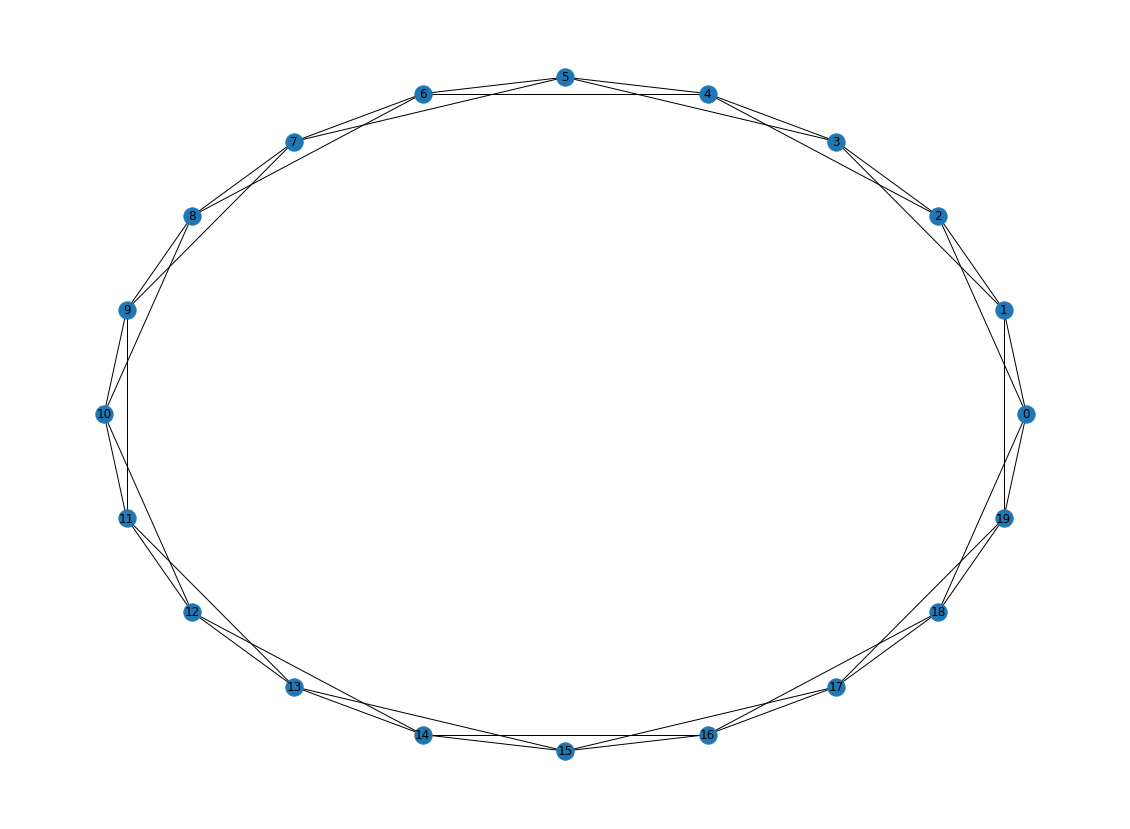

In [23]:
fig, ax = plt.subplots(1,1,figsize=(20,15))

nx.draw_circular(WSG1, with_labels=True)

In [24]:
dia = nx.diameter(WSG1)
agr = nx.transitivity(WSG1)
average_sp = nx.average_shortest_path_length(WSG1)
print(dia)
print(agr)
print(average_sp)

5
0.5
2.8947368421052633


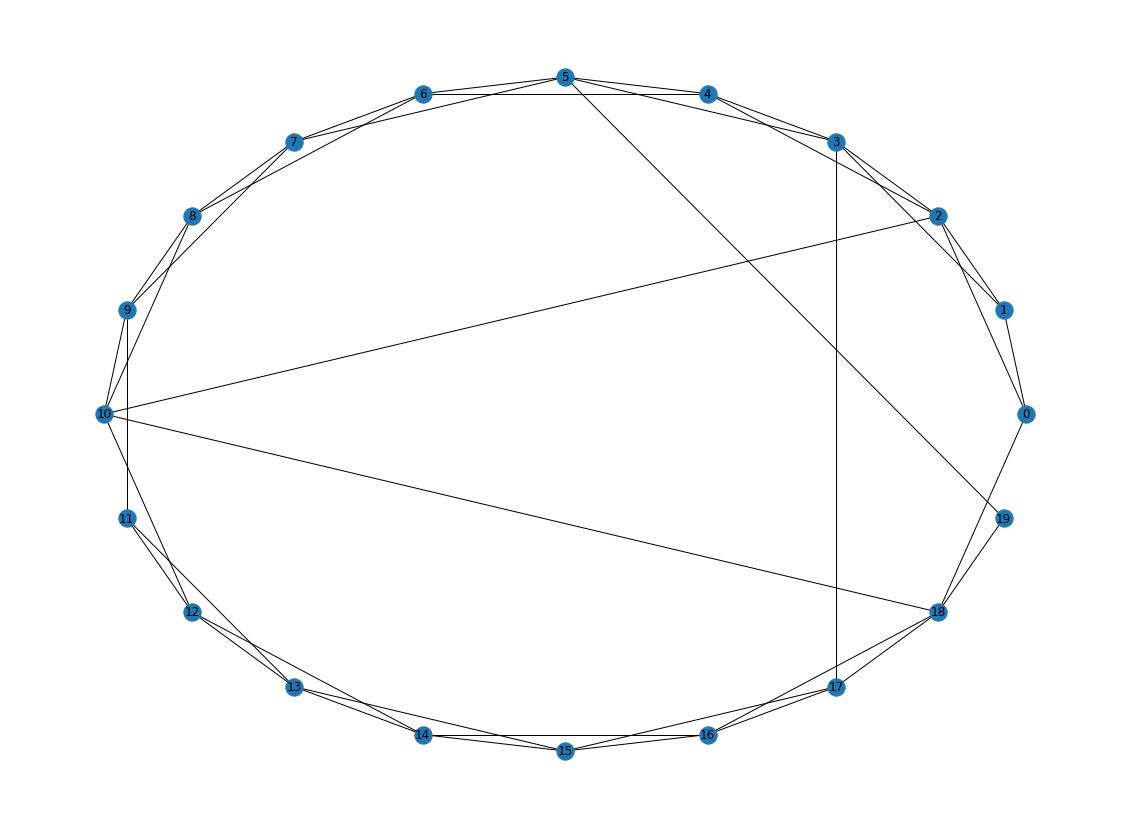

In [25]:
fig, ax = plt.subplots(1,1,figsize=(20,15))
nx.draw_circular(WSG2, with_labels=True)

In [26]:
dia = nx.diameter(WSG2)
agr = nx.transitivity(WSG2)
print(dia)
print(agr)

4
0.35714285714285715


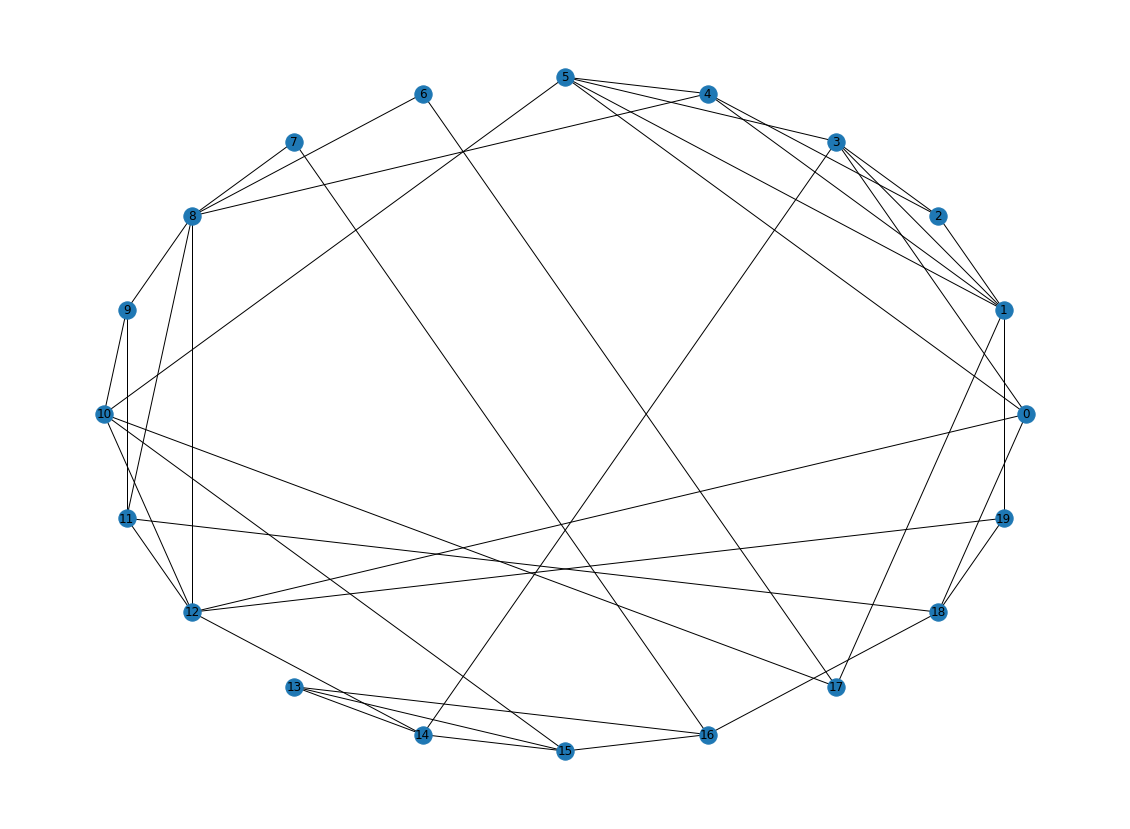

In [27]:
fig, ax = plt.subplots(1,1,figsize=(20,15))
nx.draw_circular(WSG3, with_labels=True)

In [28]:
dia = nx.diameter(WSG3)
agr = nx.transitivity(WSG3)
print(dia)
print(agr)

4
0.20149253731343283


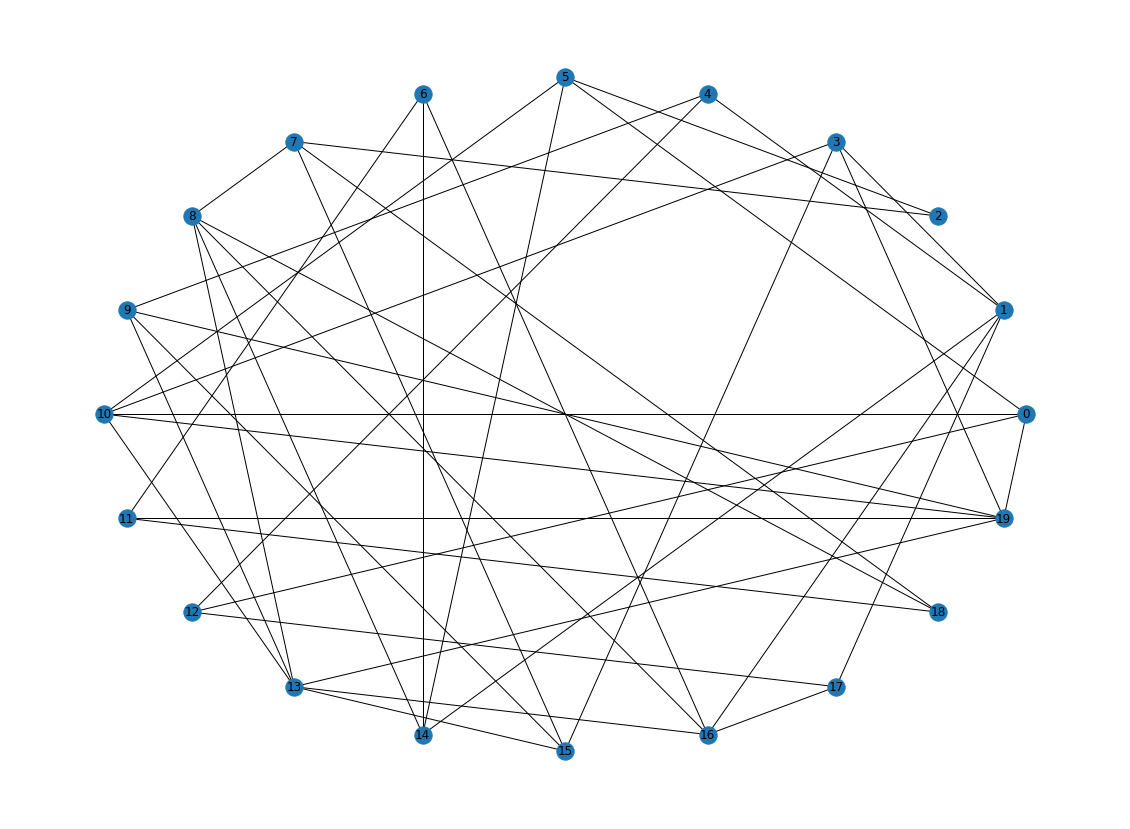

In [29]:
fig, ax = plt.subplots(1,1,figsize=(20,15))
nx.draw_circular(WSG4, with_labels=True)

In [30]:
dia = nx.diameter(WSG4)
agr = nx.transitivity(WSG4)
print(dia)
print(agr)

4
0.20610687022900764


**newman_watts_strogatz_graph(n, k, p, seed=None)**: returns a Newman–Watts–Strogatz small-world graph.

Parameters:
- n (int): The number of nodes.
- k (int): Each node is joined with its k nearest neighbors in a ring topology.
- p (float): The probability of adding a new edge for each edge.
- seed (integer, random_state, or None (default)) - Indicator of random number generation state.

Notes: 

First create a ring over nodes. 

Then each node in the ring is connected with its $k$ nearest neighbors (or $k-1$ neighbors if $k$ is odd). 
 
Then shortcuts are created by adding new edges as follows: for each edge $(u,v)$ in the underlyin “$n$-ring with $k$ nearest neighbors” with probability $p$ add a new edge $(u,w)$ with randomly-chosen existing node $w$.
 
In contrast with **watts_strogatz_graph()**, no edges are removed.

**connected_watts_strogatz_graph(n, k, p, tries=100, seed=None)**: returns a connected Watts–Strogatz small-world graph.

Attempts to generate a connected graph by repeated generation of Watts–Strogatz small-world graphs. 
An exception is raised if the maximum number of tries is exceeded.

Parameters:
- n  (int): the number of nodes
- k (int) Each node is joined with its k nearest neighbors in a ring topology.
- p (float) The probability of rewiring each edge
- tries (int) Number of attempts to generate a connected graph.
- seed (integer, random_state, or None (default)) - Indicator of random number generation state

Notes:

First create a ring over $n$ nodes. 

Then each node in the ring is joined to its $k$ nearest neighbors (or $k-1$ neighbors if $k$ is odd). 

Then shortcuts are created by replacing some edges as follows: 
for each edge $(u,w)$ in the underlying “$n$-ring with $k$ nearest neighbors” with probability $p$ replace it with a new edge $(u,w)$ with uniformly random choice of existing node $w$.

The entire process is repeated until a connected graph results.